# Roll no: 21BCE505 
# Name: Rajvi Desai
# Innovative assignment: Theory of Computation

# Aim: To check ambiguity in the context free grammar of parts of speech tag sentences and display parse trees of them

## <font color="green" >Step-1 Import Libraries</font>

In [1]:
import io
import nltk
from nltk.tree import Tree
import matplotlib.pyplot as plt

## <font color="green" >Step-2 Define function to check ambiguity of grammar</font>

In [2]:
def is_ambiguous(grammar, sentences):
    # Convert the grammar to Chomsky normal form
    cnf_grammar = nltk.CFG.fromstring(str(grammar))
    cnf_grammar.chomsky_normal_form()
    print('CNF Grammer')
    print(cnf_grammar)
    print()
    # Check if each sentence has more than one parse tree
    for sentence in sentences:
        try:
            parser = nltk.ChartParser(cnf_grammar)
            parse_trees = list(parser.parse(sentence.split()))
            num_parses = len(parse_trees)
            if num_parses > 1:
                print(f"'{sentence}' is ambiguous.\n")
                print("Parse trees of ambiguous grammar are:")
                draw_trees(parse_trees)

            else:
                print(f"'{sentence}' is unambiguous.\n")
        except ValueError:
            print(f"'{sentence}' is not present in the CFG.\n")

## <font color="green" >Step-3 Define function to plot ambiguous grammar's parse tree</font>

In [3]:
def draw_trees(trees):
    fig, axes = plt.subplots(ncols=len(trees), figsize=(len(trees)*5, 1))
    for i, tree in enumerate(trees):
        if len(trees) > 1:
            axes[i].set_title(f'Tree {i+1}')
        else:
            axes.set_title('Tree')
        sio = io.StringIO()
        tree.pretty_print(stream=sio)
        axes[i].text(0.1, 0.9, sio.getvalue(), transform=axes[i].transAxes)
        axes[i].axis('off')
    plt.show()

## <font color="green" >Step-4 Input the context free grammar and set of sentences</font>

In [4]:
grammar = """
S -> NP VP
NP -> Det N | Det N PP | N C
VP -> V NP | V NP PP
PP -> P NP 
Det -> 'a' | 'an' | 'the' 
N -> 'dog' | 'cat' | 'bird' | 'house' | 'food'
V -> 'chased' | 'ate' | 'sat'
P -> 'in' | 'on' | 'by' | 'of'
C -> 'and'
"""

sentences = [
    "the dog chased the cat",
    "a bird sat on the house",
    "the cat ate the food",
    "the bird ate the food in the house",
    "a cat chased a bird on the roof",
    "the bird sat on the roof by the food",
    "hi my name is rajvi",
    "the dog chased the cat in the house"
]

## <font color="green" >Step-5 Test the function by calling it</font>

CFG: 
S -> NP VP
NP -> Det N | Det N PP | N C
VP -> V NP | V NP PP
PP -> P NP 
Det -> 'a' | 'an' | 'the' 
N -> 'dog' | 'cat' | 'bird' | 'house' | 'food'
V -> 'chased' | 'ate' | 'sat'
P -> 'in' | 'on' | 'by' | 'of'
C -> 'and'

CNF Grammer
Grammar with 23 productions (start state = S)
    S -> NP VP
    NP -> Det N
    NP -> Det N PP
    NP -> N C
    VP -> V NP
    VP -> V NP PP
    PP -> P NP
    Det -> 'a'
    Det -> 'an'
    Det -> 'the'
    N -> 'dog'
    N -> 'cat'
    N -> 'bird'
    N -> 'house'
    N -> 'food'
    V -> 'chased'
    V -> 'ate'
    V -> 'sat'
    P -> 'in'
    P -> 'on'
    P -> 'by'
    P -> 'of'
    C -> 'and'

'the dog chased the cat' is unambiguous.

'a bird sat on the house' is unambiguous.

'the cat ate the food' is unambiguous.

'the bird ate the food in the house' is ambiguous.

Parse trees of ambiguous grammar are:


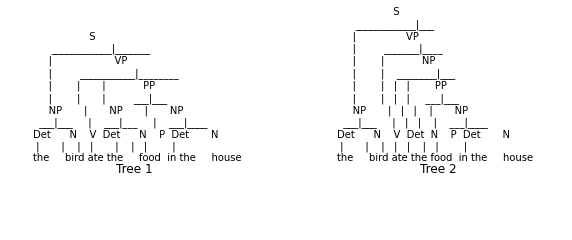

'a cat chased a bird on the roof' is not present in the CFG.

'the bird sat on the roof by the food' is not present in the CFG.

'hi my name is rajvi' is not present in the CFG.

'the dog chased the cat in the house' is ambiguous.

Parse trees of ambiguous grammar are:


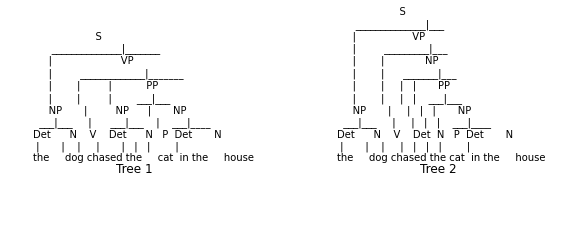

In [5]:
print(f'CFG: {grammar}')
is_ambiguous(grammar, sentences)